In [1]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d

In [3]:
# You will need to do the following at the beginning for the LVK plots 
# pip install deepdish
# pip install gwpopulation

In [2]:
from gwpopulation.models.redshift import PowerLawRedshift
# from bilby.core.result import read_in_result
from scipy.interpolate import interp1d
import deepdish as dd

In [4]:
# ----- For mass dist plot --------
mass_PP_path = 'src/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_mass_data.h5'
with open(mass_PP_path, 'r') as _data:
    _data = dd.io.load(mass_PP_path)
    print(_data.keys())
    print(_data['lines'].keys())

dict_keys(['lines', 'ppd'])
dict_keys(['mass_1', 'mass_ratio'])


In [5]:
def mass_spectrum_plot(filenames, limits, labels):
    """
    Generates a plot of the PPD and X% credible region for the mass distribution,
    where X=limits[1]-limits[0]
    """
    mass_1 = np.linspace(2, 100, 1000)
    mass_ratio = np.linspace(0.1, 1, 500)
    mass_1_grid, mass_ratio_grid = np.meshgrid(mass_1, mass_ratio)
    
    for filename, label in zip(filenames, labels):
        with open(filename, 'r') as _data:
            _data = dd.io.load(filename)
            lines = _data["lines"]
            ppd = _data["ppd"]

        # marginalize over q to get the ppd in terms of m1 only
        mass_1_ppd = np.trapz(ppd, mass_ratio, axis=0)
        # marginalize over m1 to get the ppd in terms of q only
        mass_ratio_ppd = np.trapz(ppd, mass_1, axis=-1)

        # plot the PPD as a solid line
        plt.semilogy(mass_1, mass_1_ppd, linewidth = 2, linestyle = '-', zorder = 3)#label=label, color = '#ff7f0e')

    plt.xlim(2, 130)
    plt.ylim(1e-4, 10)

## For redshift plot 

In [6]:
redshift_PP_path = 'src/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_redshift_data.h5'
with open(redshift_PP_path, 'r') as _data:
    _data = dd.io.load(redshift_PP_path)
    print(_data.keys())
    print(_data['lines'].keys())

dict_keys(['lines', 'ppd'])
dict_keys(['redshift'])


In [7]:
def redshift_spectrum_plot(filename, limits):
    """
    Generates a plot of the PPD and X% credible region for the merger rate as a function of redshift,
    where X=limits[1]-limits[0]
    """
#     fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    model = PowerLawRedshift(z_max=1.9)
    redshifts = model.zs_

    with open(filename, 'r') as _data:
        _data = dd.io.load(filename)
        lines = _data["lines"]
        ppd = _data["ppd"]
            
    label = 'Redshift Distribution'

    plt.plot(redshifts, ppd, label=label, linewidth = 2, color = 'green')
    plt.fill_between(
        redshifts,
        np.percentile(lines["redshift"], limits[0], axis=0),
        np.percentile(lines["redshift"], limits[1], axis=0),
        alpha=0.15, color = 'green'
    )

    ylabel = "$\\mathcal{R}(z)$ [Gpc$^{-3}$yr$^{-1}$]"

## Plotting data

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


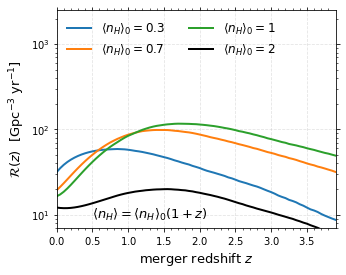

In [8]:
plt.style.use('./src/mesa.mplstyle10')
from scipy.signal import savgol_filter
redshift = np.arange(0,6.05,0.05)


dirname = './data/z_linear/ISM_and_BBH_pt3/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
# plt.plot(redshift, df.iloc[:,1]*1e9 , linewidth = 2)
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2)


dirname = './data/z_linear/ISM_and_BBH_1/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
# redshift = np.arange(0,6.05,0.05)
# plt.plot(redshift, df.iloc[:,1]*1e9 , linewidth = 2)
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2)


dirname = './data/z_linear/ISM_and_BBH_2/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
# plt.plot(redshift, df.iloc[:,1]*1e9 , linewidth = 2,  color = 'brown')
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2)


dirname = './data/in_vacuum/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
# plt.plot(redshift, df.iloc[:,1]*1e9, linewidth = 2)
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2, color ='k')


# --------- Uncomment to see the LVK infered range --------
# redshift_spectrum_plot(redshift_PP_path, limits=[5,95])

plt.yscale('log')
plt.xlim(0,3.9)
plt.ylim(7,2.5e3)
plt.text(0.5, 9, '$\\langle n_H \\rangle = \\langle n_H \\rangle_0 (1+z)$')
# plt.fill_between([0,0.05], 17.3, 45, color = 'pink') # O3a LIGO bounds
plt.xlabel('merger redshift $z$')
plt.ylabel('$\\mathcal{R} (z)$  [Gpc$^{-3}$ yr$^{-1}$]')
plt.grid(linestyle = '--', alpha = 0.35)
# orange_patch = mpl.patches.Patch(color='red', label='Allowed O3(a+b) local BBH merger rate')
plt.legend(['$\\langle n_H \\rangle_0 = 0.3$', '$\\langle n_H \\rangle_0 = 0.7$', '$\\langle n_H \\rangle_0 = 1$',
            '$\\langle n_H \\rangle_0 = 2$', 'In vacuum', 'Inferred by LVK'], ncol = 2, loc = 'upper left')
# plt.savefig('figures/R_volumetric_vs__no_mass_norm_z_linear_1_per.png')

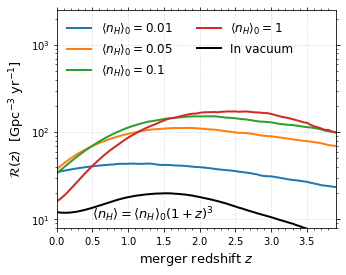

In [10]:
from scipy.signal import savgol_filter

dirname = './data/z_cube/ISM_and_BBH_pt01/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
# # plt.plot(redshift, df.iloc[:,1]*1e9 * 2 , linewidth = 2)
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2)


dirname = './data/z_cube/ISM_and_BBH_pt05/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
# # plt.plot(redshift, df.iloc[:,1]*1e9 * 2 , linewidth = 2)
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2)


dirname = './data/z_cube/ISM_and_BBH_pt1/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
# # plt.plot(redshift, df.iloc[:,1]*1e9 * 2 , linewidth = 2)
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2)


dirname = './data/z_cube/ISM_and_BBH_1/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
redshift = np.arange(0,6.05,0.05)
# plt.plot(redshift, df.iloc[:,1]*1e9 * 2 , linewidth = 2)
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2)



dirname = './data/in_vacuum/'
df =  pd.read_csv(f'{dirname}/Volumetric_data.csv', delim_whitespace=False, header = 0)
# plt.plot(redshift, df.iloc[:,1]*1e9, linewidth = 2)
yhat = savgol_filter(df.iloc[:,1]*1e9, 31, 3) # window size 51, polynomial order 3
plt.plot(redshift, yhat, linewidth = 2, color = 'k')


# --------- Uncomment to see the LVK infered range --------
# redshift_spectrum_plot(redshift_PP_path, limits=[5,95])


plt.yscale('log')
plt.xlim(0,3.9)
plt.ylim(8,2.5e3)
plt.text(0.5, 10, '$\\langle n_H \\rangle = \\langle n_H \\rangle_0 (1+z)^3$')

# plt.fill_between([0,0.05], 17.3, 45, color = 'pink') # O3a LIGO bounds
plt.xlabel('merger redshift $z$')
plt.xlabel('merger redshift $z$')
plt.ylabel('$\\mathcal{R} (z)$  [Gpc$^{-3}$ yr$^{-1}$]')
plt.grid(linestyle = '--', alpha = 0.35)
# orange_patch = mpl.patches.Patch(color='red', label='Allowed O3(a+b) local BBH merger rate')
plt.legend(['$\\langle n_H \\rangle_0 = 0.01$', '$\\langle n_H \\rangle_0 = 0.05$', '$\\langle n_H \\rangle_0 = 0.1$', \
        '$\\langle n_H \\rangle_0 = 1$', 'In vacuum', 'Inferred by LVK'],\
           ncol = 2, loc = 'upper left')# 

# plt.savefig('figures/R_volumetric_vs_z_no_mass_norm_z_cube_2_per.png')

## Below for converting SNR to detectability

In [11]:
import riroriro.detectabilityfuns as det
Theta_CDF, min_CDF, max_CDF = det.cdf_generator()

sample_snrs = range(300)
sample_dets = np.empty((len(sample_snrs))) 

for i in range(len(sample_dets)):
    sample_dets[i] = det.detectability_calculator(Theta_CDF,min_CDF,max_CDF,float(sample_snrs[i]))


Text(0, 0.5, 'Detectability')

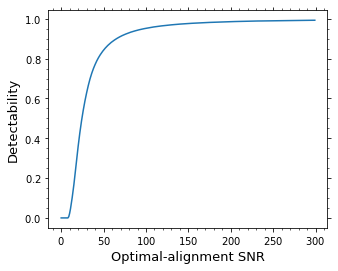

In [13]:
plt.plot(sample_snrs,sample_dets)
plt.xlabel('Optimal-alignment SNR')
plt.ylabel('Detectability')

In [14]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [15]:
# loading pdet data
# dirname = '/nesi/nobackup/uoa03218/Cosmological_coupled_BHs/'
dirname = './src'
f = open(f'{dirname}/p_det_SNR_new_KAGRA','rb')
SNR = pickle.load(f)

In [16]:
## Converting the above SNRs to detection probabilities
SNR_dect = np.zeros((200,10,80))
for i in range(0,200):
    for j in range(0,10):
        for k in range(0,80):
            index = find_nearest(sample_snrs, SNR[i][j][k])
            SNR_dect[i][j][k] = sample_dets[index]

### --- Mass vs rate plots ---

In [17]:
dirname = './data/z_linear/ISM_and_BBH_pt3/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect 
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
k_1 = np.sum(weights, axis = 0)

dirname = './data/z_linear/ISM_and_BBH_1/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect 
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
k_2 = np.sum(weights, axis = 0)

dirname = './data/z_linear/ISM_and_BBH_2/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect 
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
k_3 = np.sum(weights, axis = 0)

dirname = './data/in_vacuum/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect 
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
BPASS = np.sum(weights, axis = 0)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


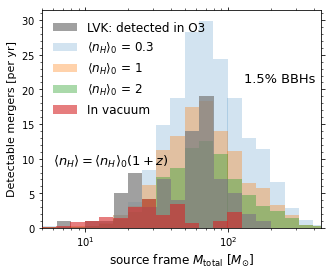

In [18]:
plt.style.use('./src/mesa.mplstyle10')
# ---------------- LVK O3 ----------------

df =  pd.read_csv('./src/LVK_obervations.csv', delim_whitespace=False, header = 0)
# x = np.arange(-1,3.1,0.1)
# del_x = (10**(x + 0.05) - 10**(x - 0.05))
ax = plt.hist(df['total_mass_source'], bins = 10**np.arange(-1,3.1,0.1), color = 'gray', alpha = 0.75, zorder = 3)


# # ------------------------ k = 1 --------------------------------
# x = np.arange(-0.95,7.05,0.1) 
# mass_tot = 10**x
# plt.bar(mass_tot, k_0, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.2,
#        zorder = 0)

# ------------------------ k = 1 --------------------------------
x = np.arange(-0.95,7.05,0.1) 
mass_tot = 10**x
plt.bar(mass_tot, k_1, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.2,
       zorder = 1)

# ------------------------ k = 2 --------------------------------
x = np.arange(-0.95,7.05,0.1) 
mass_tot = 10**x
plt.bar(mass_tot, k_2, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.35,
       zorder = 2)#, hatch = '//')

# ------------------------ k = 3 --------------------------------
x = np.arange(-0.95,7.05,0.1) 
mass_tot = 10**x
plt.bar(mass_tot, k_3, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.4,
       zorder = 2)

# ------------------------ BPASS --------------------------------
x = np.arange(-0.95,7.05,0.1) 
mass_tot = 10**x
plt.bar(mass_tot, BPASS, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.6,
       zorder = 4)

plt.xlim(5, 4.5e2)
plt.xscale('log')
plt.text(6, 9, '$\\langle n_H \\rangle = \\langle n_H \\rangle_0 (1+z)$')
plt.text(130, 21, '1.5% BBHs')
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.5,2e2)
plt.xlabel('source frame $M_{\\rm total}$ $[M_{\\odot}]$', fontsize = 12)
plt.ylabel('Detectable mergers [per yr]', fontsize = 11)
plt.legend(['LVK: detected in O3', '$\\langle n_H \\rangle_0$ = 0.3', '$\\langle n_H \\rangle_0$ = 1',
            '$\\langle n_H \\rangle_0$ = 2', 'In vacuum'])
# plt.savefig('figures/Detectable_mergers_per_year_no_mass_norm_z_linear_1_per.png')

In [19]:
dirname = './data/z_cube/ISM_and_BBH_pt01/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect 
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
k_0 = np.sum(weights, axis = 0)

dirname = './data/z_cube/ISM_and_BBH_pt05/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect 
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
k_1 = np.sum(weights, axis = 0)

dirname = './data/z_cube/ISM_and_BBH_pt1/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect 
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
k_2 = np.sum(weights, axis = 0)

dirname = './data/z_cube/ISM_and_BBH_1/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect 
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
k_3 = np.sum(weights, axis = 0)

dirname = './data/in_vacuum/'
obj =  pd.read_pickle(f'{dirname}/rate_at_z_p_M_pickle')
obj_new = obj[0]*SNR_dect
obj= np.sum(obj_new, axis = 1)
weights = obj[:10] 
BPASS = np.sum(weights, axis = 0)

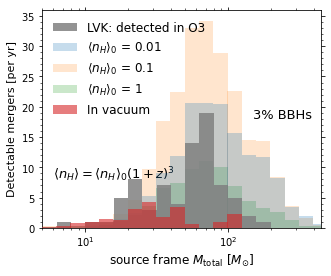

In [22]:
# plt.style.use('./src/mesa.mplstyle10')
# ---------------- LVK O3 ----------------

df =  pd.read_csv('./src/LVK_obervations.csv', delim_whitespace=False, header = 0)
# x = np.arange(-1,3.1,0.1)
# del_x = (10**(x + 0.05) - 10**(x - 0.05))
ax = plt.hist(df['total_mass_source'], bins = 10**np.arange(-1,3.1,0.1), color = 'gray', alpha = 0.85, zorder = 5)


# ------------------------ k = 1 --------------------------------
x = np.arange(-0.95,7.05,0.1) 
mass_tot = 10**x
plt.bar(mass_tot, k_0, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.25,
       zorder = 4)#, hatch = '/')

# ------------------------ k = 1 --------------------------------
x = np.arange(-0.95,7.05,0.1) 
mass_tot = 10**x
plt.bar(mass_tot, k_1, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.2,
       zorder = 1)

# # ------------------------ k = 2 --------------------------------
# x = np.arange(-0.95,7.05,0.1) 
# mass_tot = 10**x
# plt.bar(mass_tot, k_2, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.5,
#        zorder = 2, hatch = '//')

# ------------------------ k = 3 --------------------------------
x = np.arange(-0.95,7.05,0.1) 
mass_tot = 10**x
plt.bar(mass_tot, k_3, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05), alpha = 0.25,
       zorder = 3)

# ------------------------ BPASS --------------------------------
x = np.arange(-0.95,7.05,0.1) 
mass_tot = 10**x
plt.bar(mass_tot, BPASS, linewidth = 1.5, width = 10**(x + 0.05) - 10**(x - 0.05),   alpha = 0.6,
       zorder = 6)

plt.xlim(5, 4.5e2)
plt.text(6, 8, '$\\langle n_H \\rangle = \\langle n_H \\rangle_0 (1+z)^3$')
plt.text(150, 18, '3% BBHs')
plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.5,2e2)
plt.xlabel('source frame $M_{\\rm total}$ $[M_{\\odot}]$', fontsize = 12)
plt.ylabel('Detectable mergers [per yr]', fontsize = 11)
plt.legend(['LVK: detected in O3', '$\\langle n_H \\rangle_0$ = 0.01', '$\\langle n_H \\rangle_0$ = 0.1',
         '$\\langle n_H \\rangle_0$ = 1', 'In vacuum'])
# plt.savefig('figures/Detectable_mergers_per_year__no_mass_norm_z_cubed_2_per.png')